1) Проанализируем среднее время задержек по месяцам

C:\Users\Валентина\AppData\Local\Temp\ipykernel_20608\1591582116.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  fl = pd.read_csv('flights.csv')


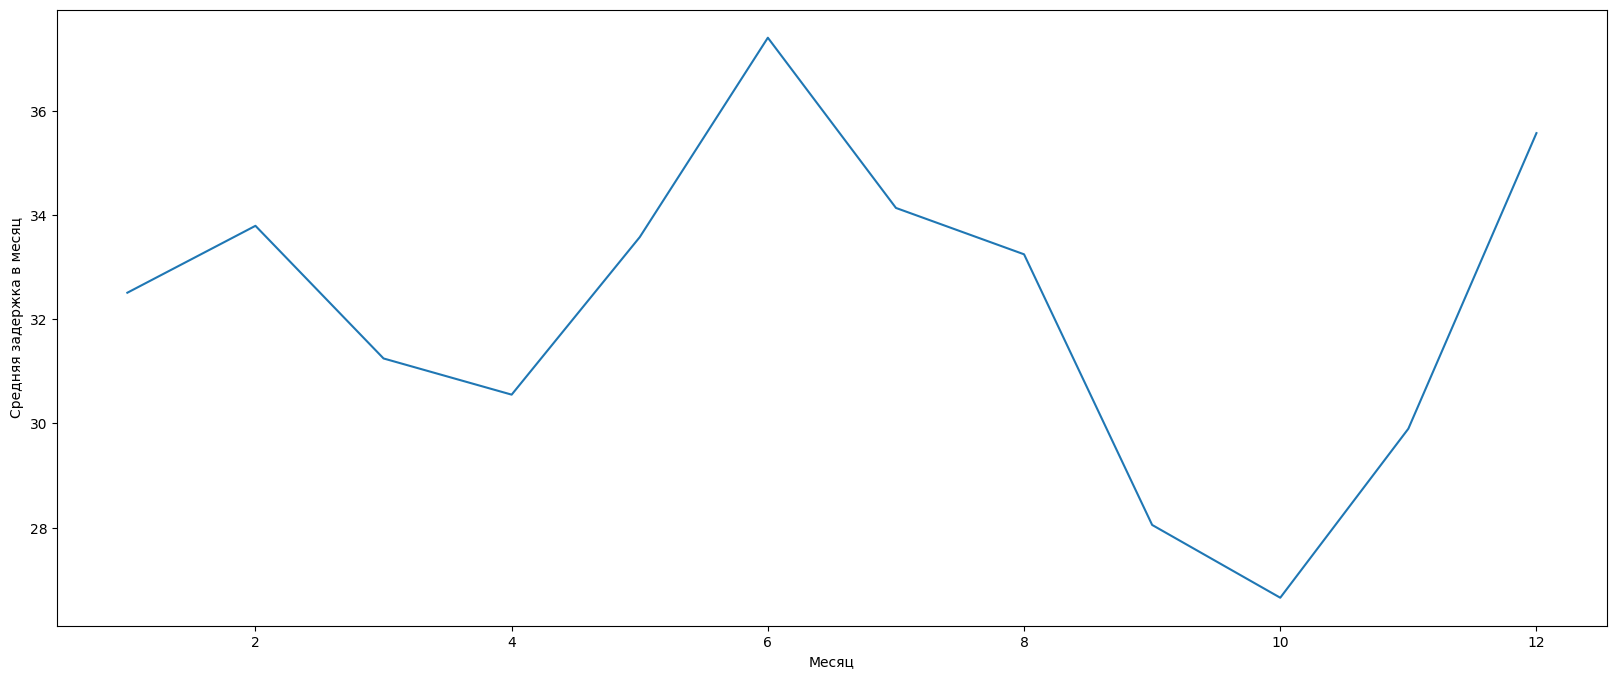

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fl = pd.read_csv('flights.csv')
#ap = pd.read_csv('airports.csv')
fl[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis = 1).sum()
fl = fl.loc[~fl[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis = 1)]

gf = pd.DataFrame(fl[fl['DEPARTURE_DELAY'] > 0].groupby([fl.MONTH])['DEPARTURE_DELAY'].mean().reset_index(name='MEAN_DELAY_DEPARTURE'))

plt.figure(figsize = (20, 8))
plt.plot(gf.MONTH, gf.MEAN_DELAY_DEPARTURE)
plt.ylabel('Средняя задержка в месяц')
plt.xlabel('Месяц')
plt.show()



Вывод: Летом и в декабре самые большие задержки, видимо летом большой трафик из-за отпусков, а зимой Новый год

2)Аналогичный анализ проведём для дней недели

0         -11.0
1          -8.0
2          -2.0
3          -5.0
4          -1.0
           ... 
5819074    -4.0
5819075    -4.0
5819076    -9.0
5819077    -6.0
5819078    15.0
Name: DEPARTURE_DELAY, Length: 5726566, dtype: float64


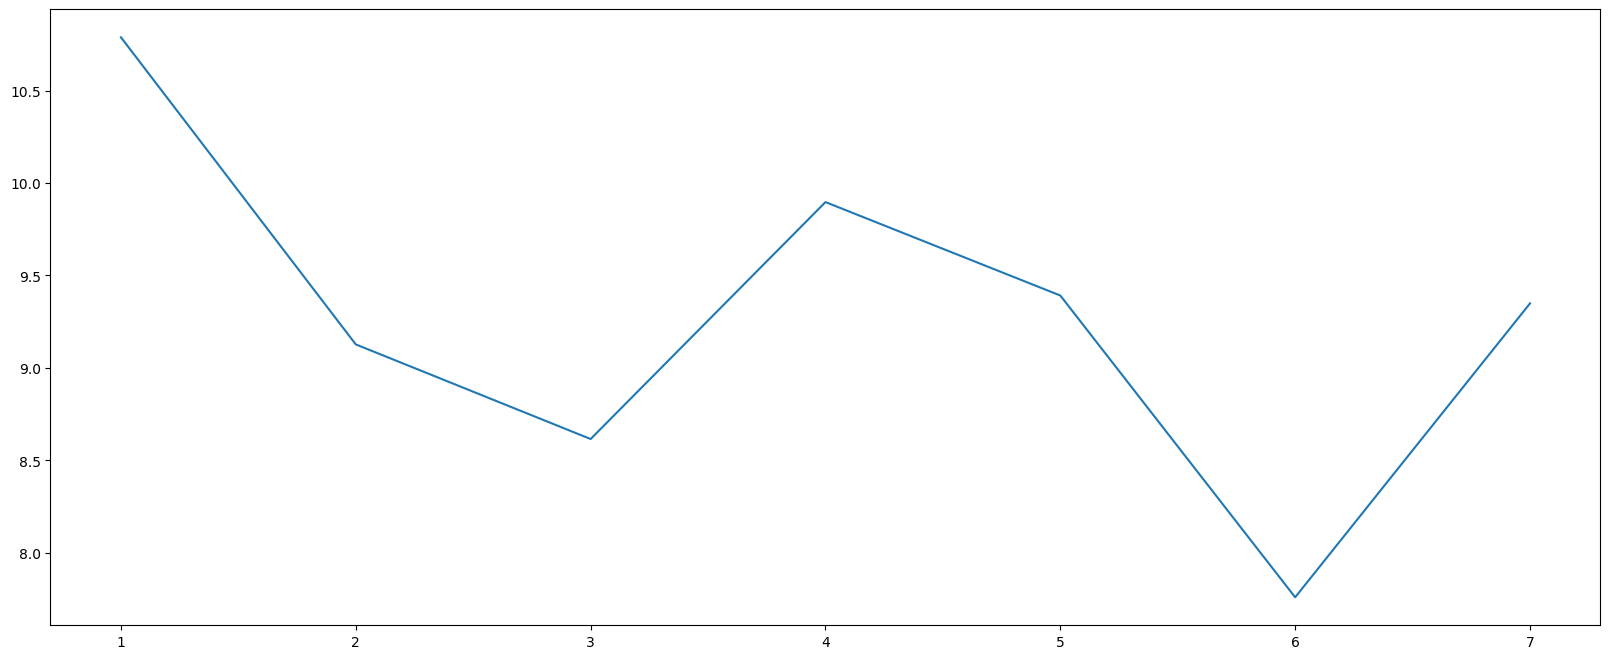

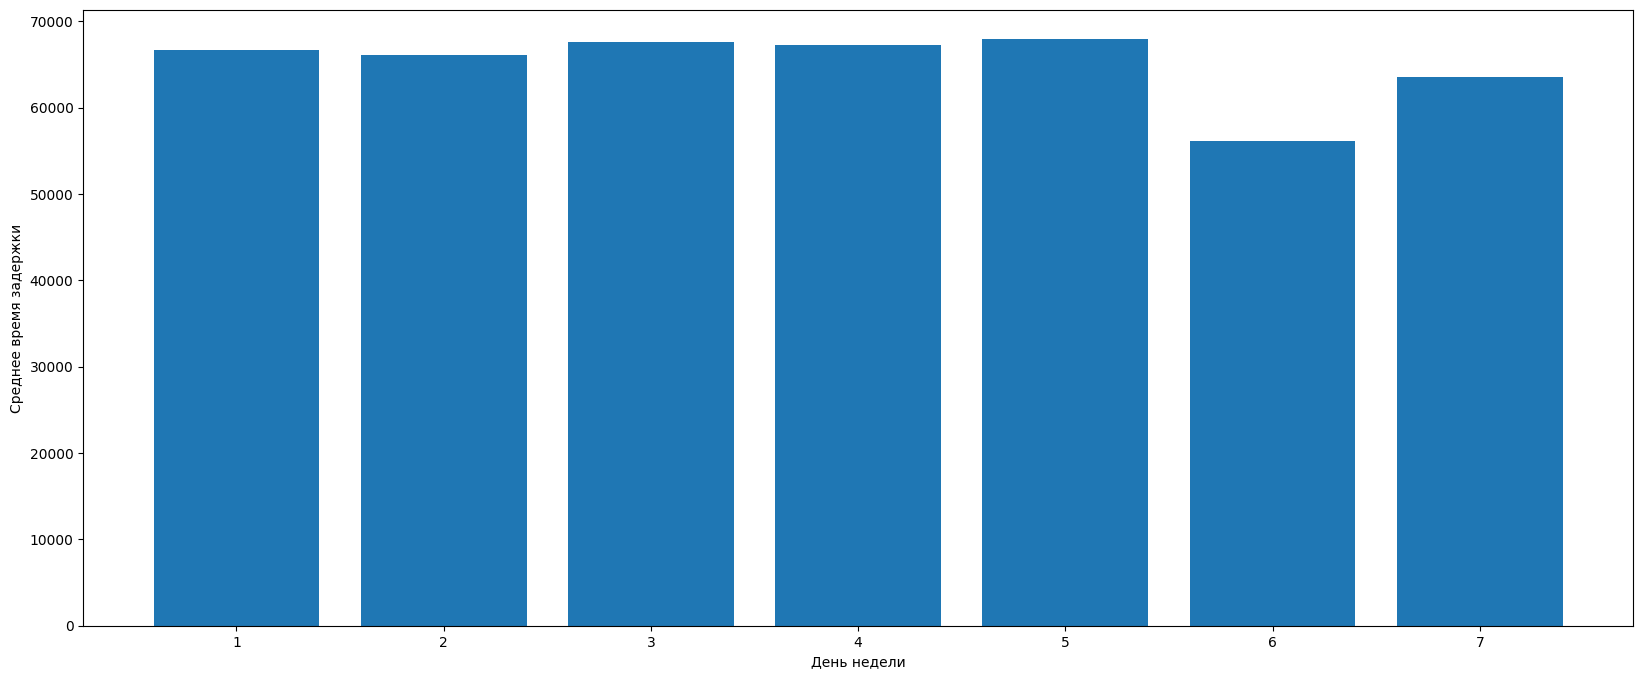

In [53]:
gf = pd.DataFrame(fl.groupby([fl.DAY_OF_WEEK])['DEPARTURE_DELAY'].mean().reset_index(name='MEAN_DELAY_DEPARTURE'))
rf = pd.DataFrame(fl.groupby([fl.DAY_OF_WEEK])['DEPARTURE_DELAY'].value_counts().reset_index(name='SUM'))


plt.figure(figsize = (20, 8))
plt.plot(gf.DAY_OF_WEEK, gf.MEAN_DELAY_DEPARTURE)
plt.figure(figsize = (20, 8))
plt.bar(rf.DAY_OF_WEEK, rf.SUM)
plt.xticks(range(1, 8))
#plt.yticks(range(5, 20))
plt.ylabel('Среднее время задержки')
plt.xlabel('День недели')
plt.show()

Вывод: В Понедельник самые большие задержки, более того, в среднем в понедельник больше всего полетов. Некоторая зависимость от количества перелетов есть: в субботу самое маленькое количество рейсов и задержки в среднем самые маленькие.

3) Рассмотрим причины задержки полётов.

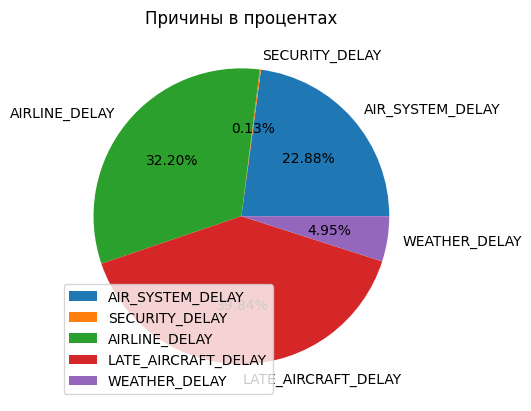

In [20]:
fls = fl.loc[~fl[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].isna().any(axis = 1)]

r = fls[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].astype(int)
plt.pie(r.sum(), labels=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"], autopct='%1.2f%%')
plt.title('Причины в процентах')
plt.legend() 
plt.show()

Вывод: Самая частая причина задержек - задержка самолёта с предыдущего рейса

4) Рассмотрим зависимость времени задержки от расстояния

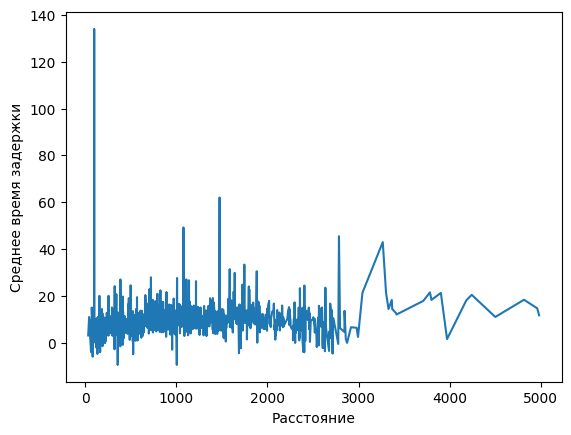

In [16]:
gf = pd.DataFrame(fl.groupby([fl.DISTANCE])['DEPARTURE_DELAY'].mean().reset_index(name='MEAN_DELAY_DEPARTURE'))
plt.plot(gf.DISTANCE, gf.MEAN_DELAY_DEPARTURE)
plt.ylabel('Среднее время задержки')
plt.xlabel('Расстояние')
plt.show()

Вывод: зависимости нет, вот этот пик около 140 это единичный случай

5) Какие авиалинии наиболее надежны с точки зрения задержек?

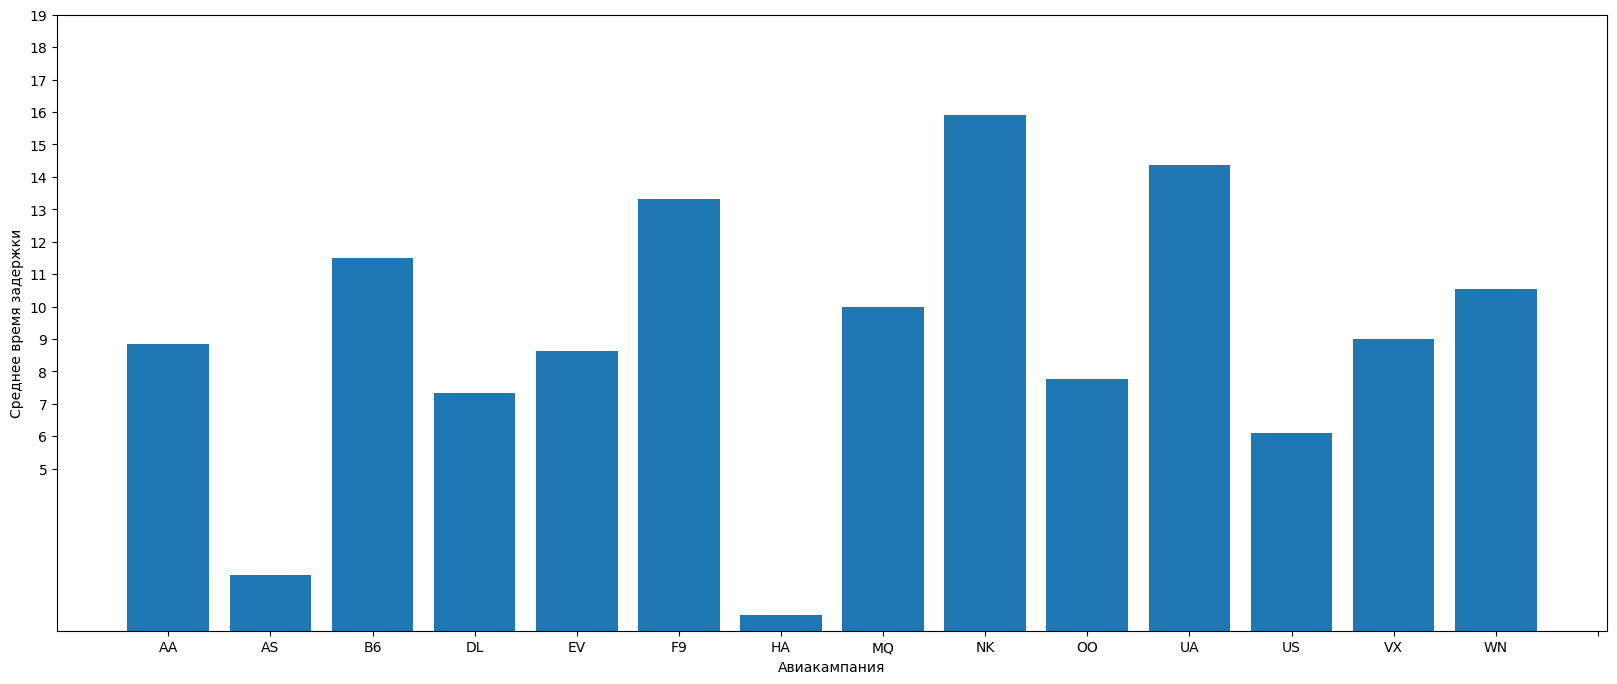

In [22]:
gf = pd.DataFrame(fl.groupby([fl.AIRLINE])['DEPARTURE_DELAY'].mean().reset_index(name='MEAN_DELAY_DEPARTURE'))
#rf = fl['AIRLINE'].value_counts()

plt.figure(figsize = (20, 8))
plt.bar(gf.AIRLINE, gf.MEAN_DELAY_DEPARTURE)
plt.xticks(range(0, 15))
plt.yticks(range(5, 20))
plt.ylabel('Среднее время задержки')
plt.xlabel('Авиакампания')
plt.show()

Вывод: В Hawaiian Airlines меньше всего задержек, в Spirit Air Lines наибольшее число задержек.

6) Среднее время задержек по аэропортам:

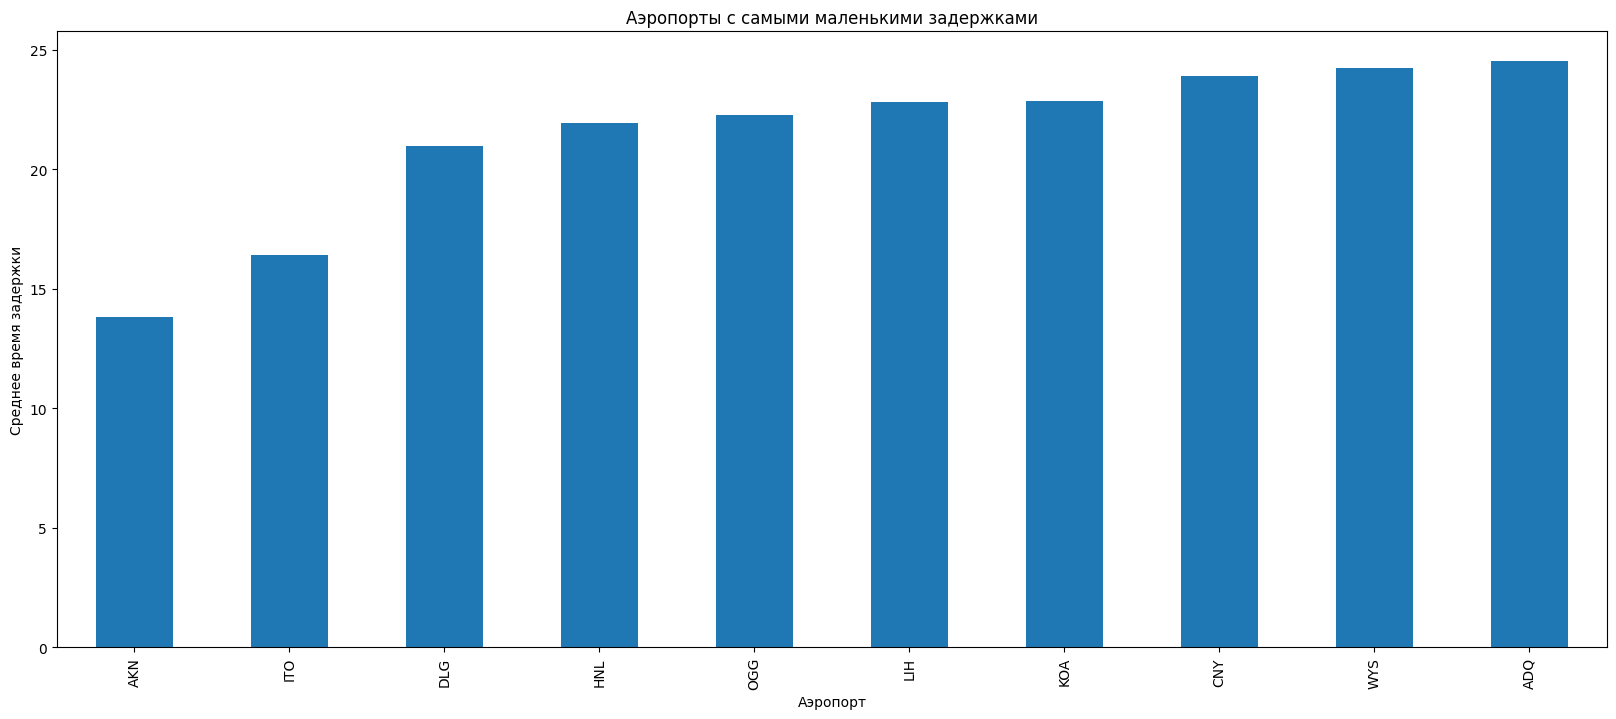

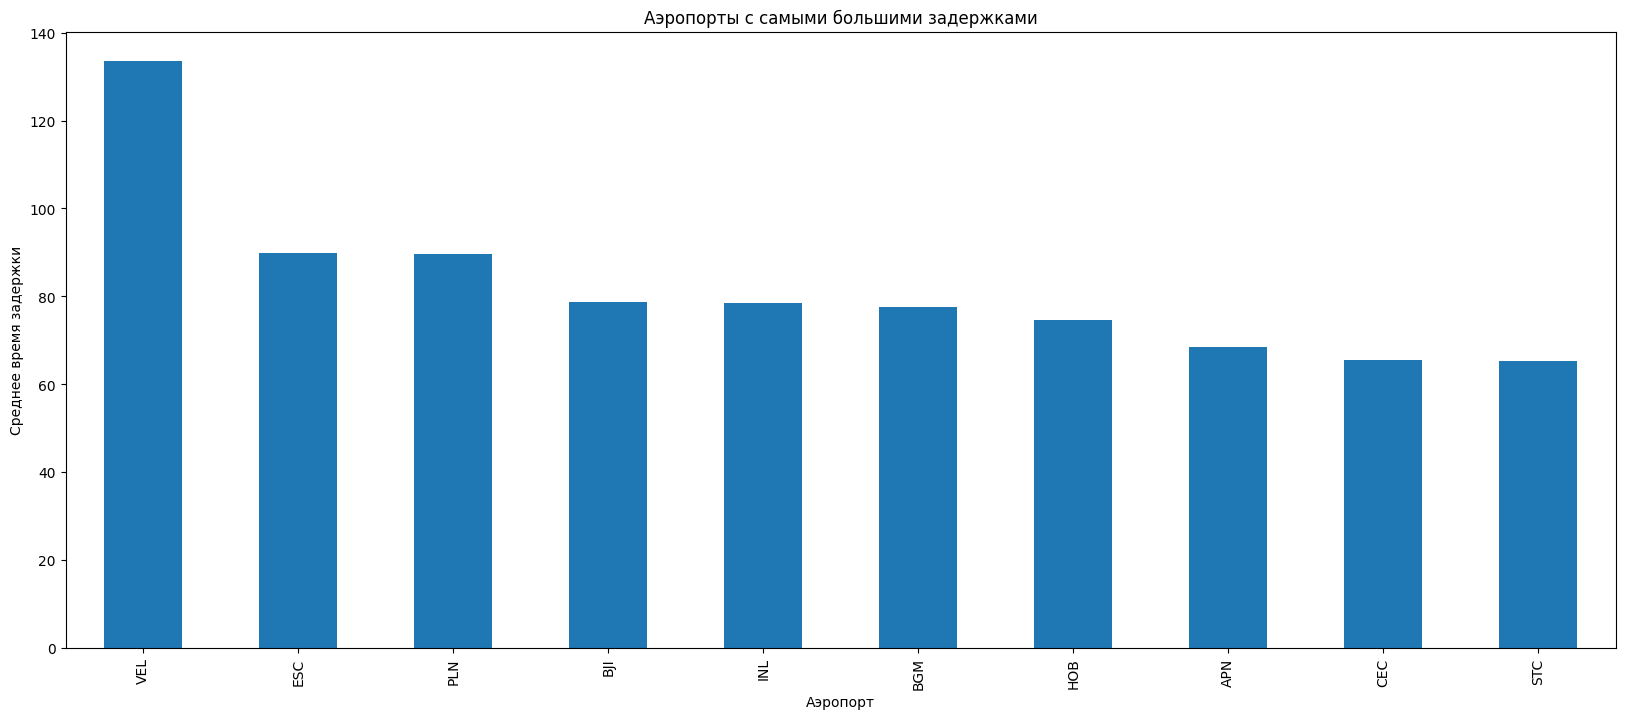

In [36]:
fl['ORIGIN_AIRPORT'] = fl.ORIGIN_AIRPORT.astype(str)
gl = fl.loc[(fl.ORIGIN_AIRPORT.apply(len) == 3)]

gmin = gl[gl['DEPARTURE_DELAY'] > 0].groupby([gl.ORIGIN_AIRPORT])['DEPARTURE_DELAY'].mean().sort_values()
gmax = gl[gl['DEPARTURE_DELAY'] > 0].groupby([gl.ORIGIN_AIRPORT])['DEPARTURE_DELAY'].mean().sort_values(ascending=False)


plt.figure(figsize = (20, 8))
gmin.head(10).plot.bar()
plt.title('Аэропорты с самыми маленькими задержками')
plt.ylabel('Среднее время задержки')
plt.xlabel('Аэропорт')
plt.show()


plt.figure(figsize = (20, 8))
gmax.head(10).plot.bar()

plt.title('Аэропорты с самыми большими задержками')
plt.ylabel('Среднее время задержки')
plt.xlabel('Аэропорт')
plt.show()

Вывод: Видимо, в аэропорте Valdez Airport что-то не так с организацией

7) Средняя задержка по дням месяца:

0         -11.0
1          -8.0
2          -2.0
3          -5.0
4          -1.0
           ... 
5819074    -4.0
5819075    -4.0
5819076    -9.0
5819077    -6.0
5819078    15.0
Name: DEPARTURE_DELAY, Length: 5726566, dtype: float64


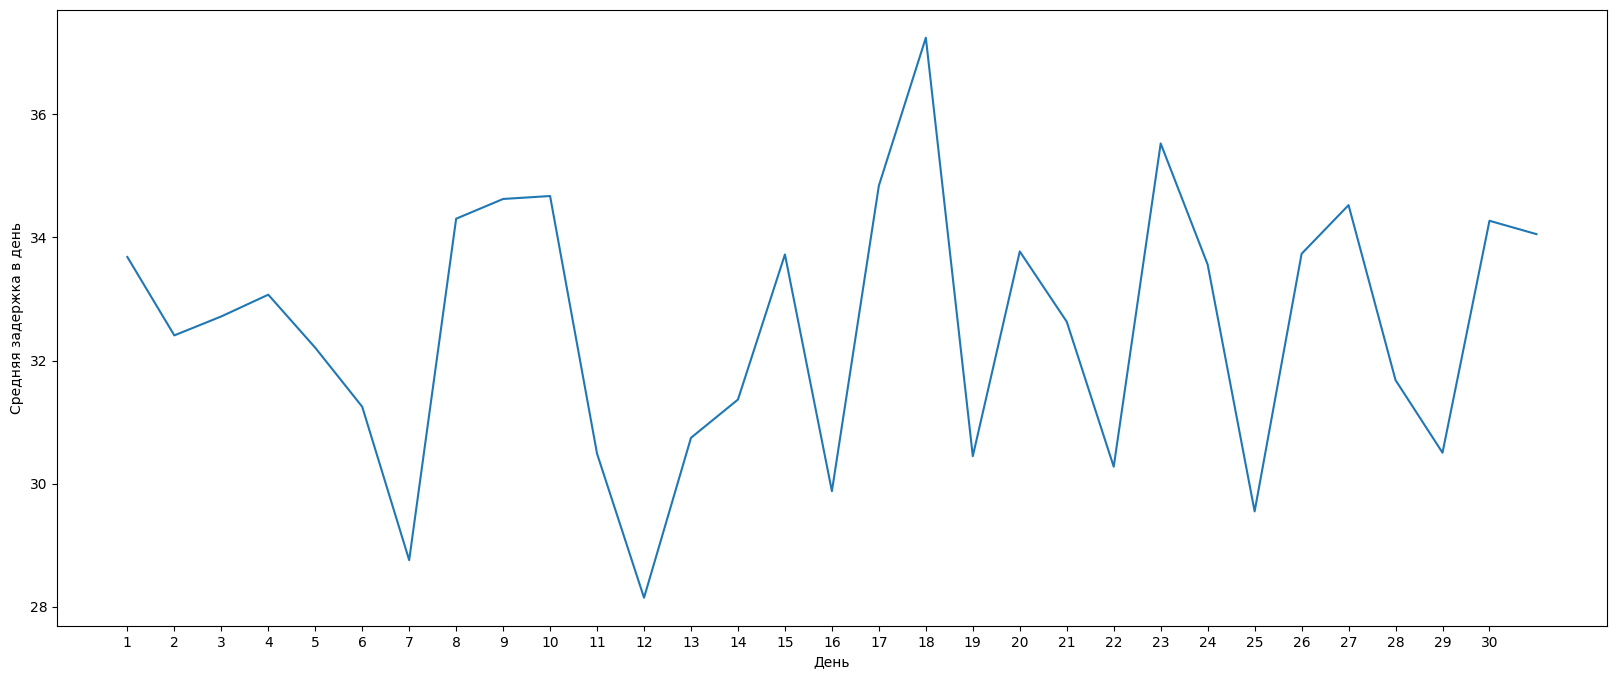

In [54]:
gf = pd.DataFrame(fl[fl['DEPARTURE_DELAY'] > 0].groupby([fl.DAY])['DEPARTURE_DELAY'].mean().reset_index(name='MEAN_DELAY_DEPARTURE'))
plt.figure(figsize = (20, 8))
plt.plot(gf.DAY, gf.MEAN_DELAY_DEPARTURE)
plt.xticks(range(1, 31))
plt.ylabel('Средняя задержка в день')
plt.xlabel('День')
plt.show()

Вывод: странно но 18-го число самые большие задержки, а 12-го самые маленькие.

8) Рассмотрим зависимость задержек от времени суток:

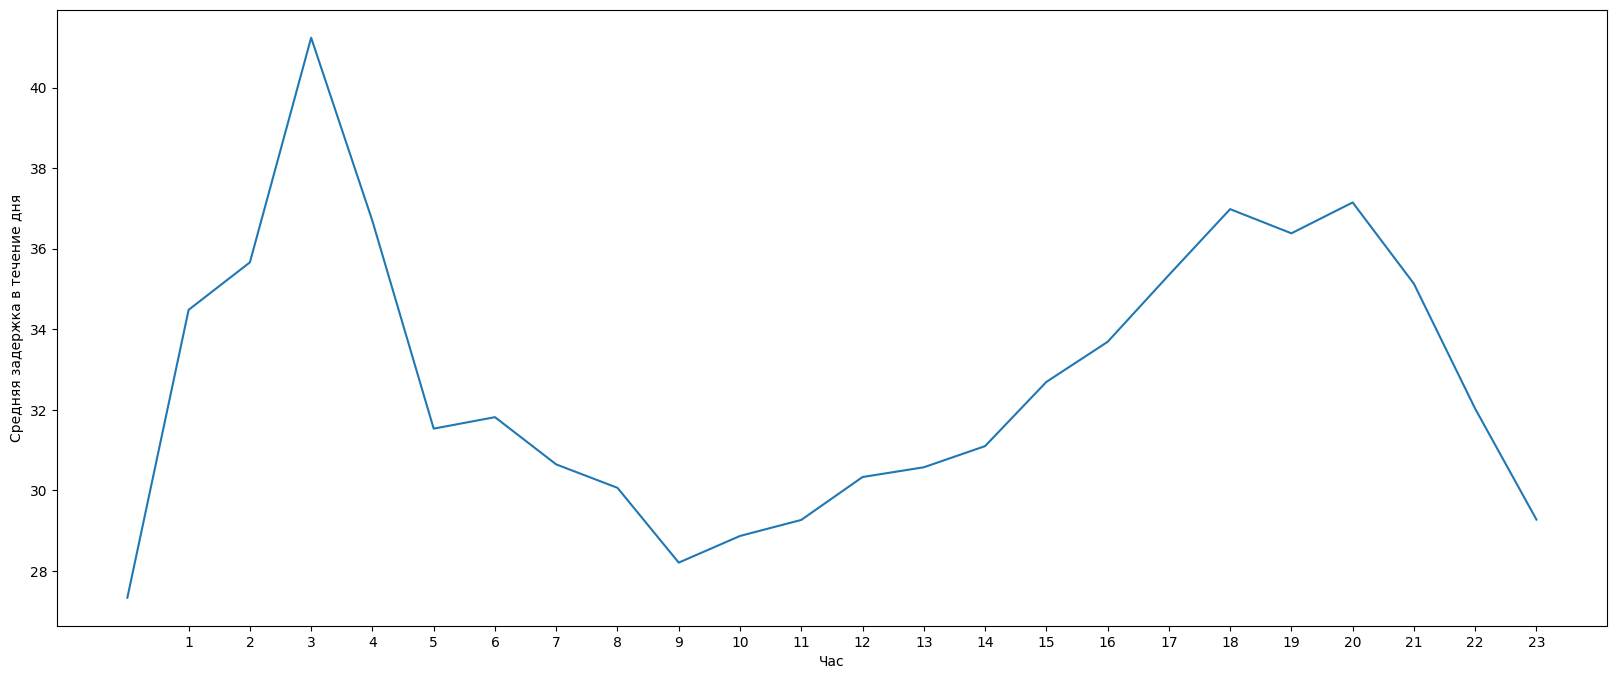

In [72]:
fl['HOUR'] = fl['SCHEDULED_DEPARTURE'].apply(lambda x: int(x)//100)


gf = pd.DataFrame(fl[fl['DEPARTURE_DELAY'] > 0].groupby([fl.HOUR])['DEPARTURE_DELAY'].mean().reset_index(name='MEAN_DELAY_DEPARTURE'))


plt.figure(figsize = (20, 8))
plt.plot(gf.HOUR, gf.MEAN_DELAY_DEPARTURE)
plt.xticks(range(1, 24))
plt.ylabel('Средняя задержка в течение дня')
plt.xlabel('Час')
plt.show()


Вывод: самые большие задержки ночью, где-то с 02:00 до 04:00

9) Анализ задержек по штатам

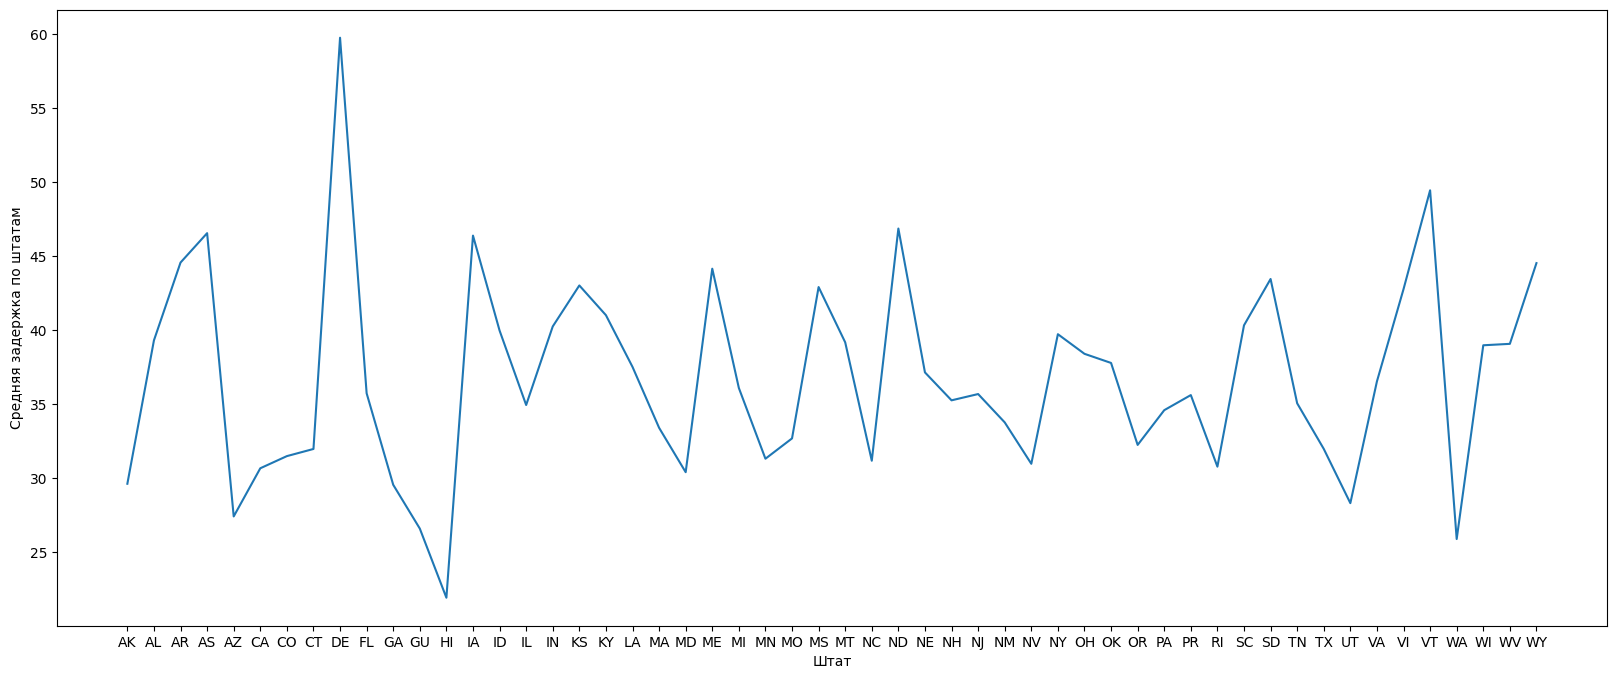

In [79]:
ap = pd.read_csv('airports.csv')
ap = ap.rename(columns={'IATA_CODE': 'ORIGIN_AIRPORT'})
fl = fl.merge(ap[["ORIGIN_AIRPORT", "AIRPORT", "CITY", "STATE"]], on='ORIGIN_AIRPORT')

gf = pd.DataFrame(fl[fl['DEPARTURE_DELAY'] > 0].groupby([fl.STATE])['DEPARTURE_DELAY'].mean().reset_index(name='MEAN_DELAY_DEPARTURE'))

plt.figure(figsize = (20, 8))
plt.plot(gf.STATE, gf.MEAN_DELAY_DEPARTURE)
#plt.xticks(range(1, 24))
plt.ylabel('Средняя задержка по штатам')
plt.xlabel('Штат')
plt.show()

Вывод: в штате Делавэр в среднес самые большие задержки, а в штате Гавайи самые маленькие 

10) Рассмотрим зависимость задержек из-за погоды от месяца

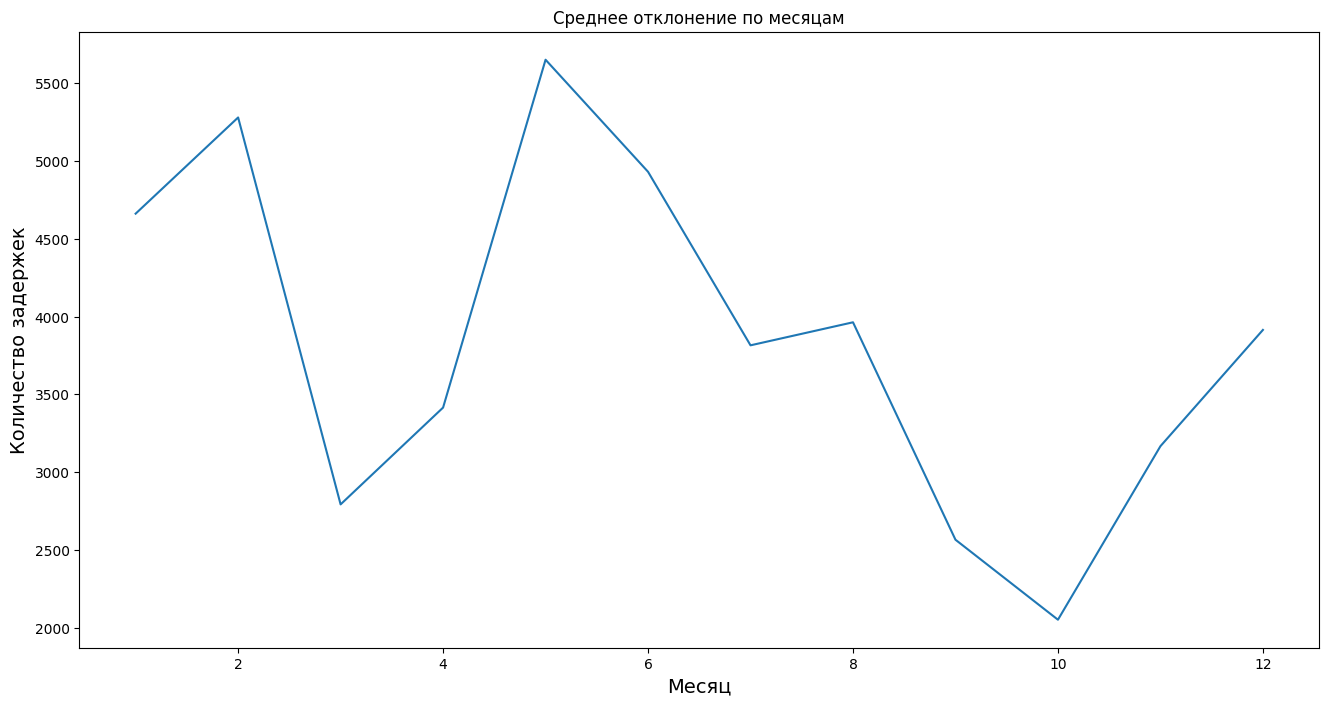

In [17]:
fls = fl.loc[~fl[['WEATHER_DELAY']].isna().any(axis = 1)]

sd = fls.groupby(['MONTH'])['WEATHER_DELAY'].value_counts()
k = np.array([])
for i in range(1, 13):
    k = np.append(k, sd[i][1:].values.sum())
    
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1, 13), k, label = 'Среднее отклонение по месяцам')
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество задержек', fontsize=14)
plt.title('Среднее отклонение по месяцам')
plt.show()


In [ ]:
Вывод: из-за погодных условий задержки происходят в основном в Мае, а в октябре таких почти нет. 